<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-cad_equipo113/blob/main/Reto_Parte_1_y_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto

## Jessica Paola Pulido Vasquez - A01793650
## Joan Sebastian Jimenez Chacón- A01793970


**Ciencia de Datos**

*Maria de la Paz Rico Fernandez*

18 de Noviembre de 2022


### Actividad
**Limpieza, análisis, visualización y agrupamiento.**

En esta base de datos encontraras: Aguas subterraneas y Aguas superficiales.

Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas, realiza: 

*   Limpieza de base de datos.
*   Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
  - Identificando tendencias centrales promedio, media y mediana de los datos. 
  - Identificar medidas de dispersión, máximo, mínimo .
  - Identificar medidas de posición no centrales , los cuartiles , outliers.   
  - Identificar correlaciones.
  - Preparar los datos 
*   Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
*   Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.





In [2]:
import os
import math
import requests, zipfile 
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import pydotplus
from io import BytesIO
from google.colab import drive
from IPython.display import Image
from sklearn import tree
from sklearn import preprocessing
from sklearn import svm, datasets
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.datasets import load_iris
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import QuantileTransformer 
from sklearn.preprocessing import power_transform 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.model_selection import cross_validate,  RepeatedStratifiedKFold

In [3]:
#Intalación libreria de mapas geograficos
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 742 kB/s 
     |████████████████████████████████| 1.0 MB 53.7 MB/s 
     |████████████████████████████████| 1.7 MB 44.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 62.1 MB/s 
     |████████████████████████████████| 6.3 MB 56.5 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=7219eaa36e40eafc064b7f75d71cf57761d315bf17383b62aff43f24d7cf1c38
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=3bfe4de3bcacb20d1ec123f5a64a076bb8b84a00989284dbebb40b39299956fd
  Stored in directory: /root/.

In [4]:
import geopandas as gpd
from shapely.geometry import Point


### Carga de datos
<br>
Se escoge la base de datos de aguas subterraneas.

In [5]:
drive.mount("/content/drive/")
DIR = "/content/drive/MyDrive/Datos_de_calidad_del_agua_2020"
os.chdir(DIR)
df_sub= pd.read_csv("Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv", encoding = 'latin1')
df_sub

Mounted at /content/drive/


CLAVE                                     SITIO  \
0          DLAGU6                              POZO SAN GIL   
1       DLAGU6516                    POZO R013 CAÑADA HONDA   
2          DLAGU7                                POZO COSIO   
3          DLAGU9                        POZO EL SALITRILLO   
4        DLBAJ107                        RANCHO EL TECOLOTE   
...           ...                                       ...   
1063  OCRBR5101M1              L-310 (COMUNIDAD SAN MANUEL)   
1064  OCRBR5102M1  L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS)   
1065  OCRBR5105M2                HACIENDA MEXIQUITO POZO 01   
1066  OCRBR5106M1                     COMUNIDAD LOS POCITOS   
1067  OCRBR5109M1                      COMUNIDAD LA REFORMA   

               ORGANISMO_DE_CUENCA               ESTADO          MUNICIPIO  \
0          LERMA SANTIAGO PACIFICO       AGUASCALIENTES           ASIENTOS   
1          LERMA SANTIAGO PACIFICO       AGUASCALIENTES     AGUASCALIENTES   
2          LERMA SANTIAGO PACIFICO       AGUASCALIENTES              COSIO   
3          LERMA SANTIAGO PACIFICO       AGUASCALIENTES    RINCON DE ROMOS   
4     PENINSULA DE BAJA CALIFORNIA  BAJA CALIFORNIA SUR             LA PAZ   
...                            ...                  ...                ...   
1063                     RIO BRAVO           NUEVO LEON            LINARES   
1064                     RIO BRAVO           NUEVO LEON            LINARES   
1065                     RIO BRAVO           NUEVO LEON  CADEREYTA JIMENEZ   
1066                     RIO BRAVO           NUEVO LEON            GALEANA   
1067                     RIO BRAVO           NUEVO LEON            GALEANA   

                     ACUIFERO SUBTIPO   LONGITUD   LATITUD  PERIODO  ...  \
0          VALLE DE CHICALOTE    POZO -102.02210  22.20887     2020  ...   
1          VALLE DE CHICALOTE    POZO -102.20075  21.99958     2020  ...   
2     VALLE DE AGUASCALIENTES    POZO -102.28801  22.36685     2020  ...   
3     VALLE DE AGUASCALIENTES    POZO -102.29449  22.18435     2020  ...   
4                TODOS SANTOS    POZO -110.24480  23.45138     2020  ...   
...                       ...     ...        ...       ...      ...  ...   
1063            CITRICOLA SUR    POZO  -99.54191  24.76036     2020  ...   
1064            CITRICOLA SUR    POZO  -99.70099  24.78280     2020  ...   
1065          CITRICOLA NORTE    POZO  -99.82249  25.55197     2020  ...   
1066    NAVIDAD-POTOSI-RAICES    POZO -100.32683  24.80118     2020  ...   
1067    NAVIDAD-POTOSI-RAICES    POZO -100.73302  25.09380     2020  ...   

      CUMPLE_CON_DUR CUMPLE_CON_CF  CUMPLE_CON_NO3 CUMPLE_CON_AS  \
0                 SI            SI              SI            SI   
1                 SI            SI              SI            SI   
2                 SI            SI              SI            NO   
3                 SI            SI              SI            SI   
4                 SI            SI              NO            SI   
...              ...           ...             ...           ...   
1063              NO            SI              NO            SI   
1064              SI            SI              NO            SI   
1065              NO            SI              NO            SI   
1066              SI            SI              SI            SI   
1067              SI            SI              SI            SI   

      CUMPLE_CON_CD CUMPLE_CON_CR CUMPLE_CON_HG CUMPLE_CON_PB CUMPLE_CON_MN  \
0                SI            SI            SI            SI            SI   
1                SI            SI            SI            SI            SI   
2                SI            SI            SI            SI            SI   
3                SI            SI            SI            SI            SI   
4                SI            SI            SI            SI            SI   
...             ...           ...           ...           ...           ...   
1063             SI            SI  

### Análisis de datos para realizar limpieza de los datos

**Cantidad de columnas**

In [6]:
df_sub.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

**Cantidad de valores nulos**

In [7]:
df_aguas=df_sub.copy()
df_aguas.isna().sum().sort_values(ascending=False) 


SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

**Tipo de variables**

In [8]:
df_aguas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

**Analisis de variables númericas**

In [9]:
columnas_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_mg/L','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']
df_num=df_aguas[columnas_numericas]
df_num.head()


ALC_mg/L  CONDUCT_mS/cm  SDT_mg/L SDT_M_mg/L FLUORUROS_mg/L  DUR_mg/L  \
0   229.990          940.0       NaN      603.6         0.9766   213.732   
1   231.990          608.0       NaN      445.4         0.9298  185.0514   
2   204.920          532.0       NaN        342         1.8045   120.719   
3   327.000          686.0       NaN      478.6         1.1229   199.879   
4   309.885         1841.0       NaN       1179         0.2343  476.9872   

  COLI_FEC_NMP/100_mL N_NO3_mg/L AS_TOT_mg/L CD_TOT_mg/L CR_TOT_mg/L  \
0                <1.1   4.184656      0.0161      <0.003      <0.005   
1                <1.1    5.75011      0.0134      <0.003      <0.005   
2                <1.1   1.449803       0.037      <0.003      <0.005   
3                <1.1   1.258597      0.0154      <0.003       0.005   
4                 291  15.672251       <0.01      <0.003      <0.005   

  HG_TOT_mg/L PB_TOT_mg/L MN_TOT_mg/L FE_TOT_mg/L  
0     <0.0005      <0.005     <0.0015      0.0891  
1     <0.0005      <0.005     <0.0015      <0.025  
2     <0.0005      <0.005     <0.0015      <0.025  
3     <0.0005      <0.005     <0.0015      <0.025  
4     <0.0005      <0.005     <0.0015      <0.025

**Cantidad de valores por variable**

In [10]:
for i in columnas_numericas:
  print("\nCOLUMNA:\n" + i+"\n")
  print("CANTIDAD DE VALORES UNICOS:\n") 
  print(df_num[i].value_counts())


COLUMNA:
ALC_mg/L

CANTIDAD DE VALORES UNICOS:

157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64

COLUMNA:
CONDUCT_mS/cm

CANTIDAD DE VALORES UNICOS:

777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64

COLUMNA:
SDT_mg/L

CANTIDAD DE VALORES UNICOS:

Series([], Name: SDT_mg/L, dtype: int64)

COLUMNA:
SDT_M_mg/L

CANTIDAD DE VALORES UNICOS:

496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64

COLUMNA:
FLUORUROS_mg/L

CANTIDAD DE VALORES UNICOS:

<0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
         ... 
1.6185      1
0.6045      1
0.7042      1
0.4343      1
0.4002    

Se identifica que existen valores de '<' que deben ser eliminados para seguir trabajando con las variables númericas.

In [11]:
for name in columnas_numericas:
  df_num[name] = df_num[name].astype('str')
  df_num[name] = df_num[name].str.replace('<','') 
  df_num[name]= df_num[name].astype('float')

df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_mg/L             0 non-null      float64
 3   SDT_M_mg/L           1066 non-null   float64
 4   FLUORUROS_mg/L       1068 non-null   float64
 5   DUR_mg/L             1067 non-null   float64
 6   COLI_FEC_NMP/100_mL  1068 non-null   float64
 7   N_NO3_mg/L           1067 non-null   float64
 8   AS_TOT_mg/L          1068 non-null   float64
 9   CD_TOT_mg/L          1068 non-null   float64
 10  CR_TOT_mg/L          1068 non-null   float64
 11  HG_TOT_mg/L          1068 non-null   float64
 12  PB_TOT_mg/L          1068 non-null   float64
 13  MN_TOT_mg/L          1068 non-null   float64
 14  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(15)
memory usage: 125.3 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Verificación del cambio

In [12]:
df_num.head()

ALC_mg/L  CONDUCT_mS/cm  SDT_mg/L  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
0   229.990          940.0       NaN       603.6          0.9766  213.7320   
1   231.990          608.0       NaN       445.4          0.9298  185.0514   
2   204.920          532.0       NaN       342.0          1.8045  120.7190   
3   327.000          686.0       NaN       478.6          1.1229  199.8790   
4   309.885         1841.0       NaN      1179.0          0.2343  476.9872   

   COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
0                  1.1    4.184656       0.0161        0.003        0.005   
1                  1.1    5.750110       0.0134        0.003        0.005   
2                  1.1    1.449803       0.0370        0.003        0.005   
3                  1.1    1.258597       0.0154        0.003        0.005   
4                291.0   15.672251       0.0100        0.003        0.005   

   HG_TOT_mg/L  PB_TOT_mg/L  MN_TOT_mg/L  FE_TOT_mg/L  
0       0.0005        0.005       0.0015       0.0891  
1       0.0005        0.005       0.0015       0.0250  
2       0.0005        0.005       0.0015       0.0250  
3       0.0005        0.005       0.0015       0.0250  
4       0.0005        0.005       0.0015       0.0250

**Análisis de variable de salida**

<class 'pandas.core.frame.DataFrame'>


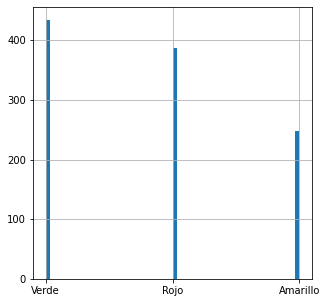

In [13]:
y= pd.DataFrame(df_aguas['SEMAFORO'])
y
print(type(y))
y['SEMAFORO'].hist(bins = 60, figsize=(5,5))

Se identifica que la columna 'SDT_mg/L' está vacía por lo que se procede a borrarla.

In [14]:
df_num.drop('SDT_mg/L', axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


**Verificación de cambios**

In [15]:
print(df_num.columns)
print(df_num.info())
print(df_num.isnull().sum())

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1

**Imputación de variables númericas**

Se procede a cambiar los valores nulos usando la mediana de la columna.

In [16]:
columnas_numericas_nuevas= ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L'] #sin ,'SDT_mg/L'

for name in columnas_numericas_nuevas:
  mediana = df_num[name].median() 
  df_num[name]= df_num[name].replace(np.nan, mediana)

df_num.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

**Verificación de valores nulos en las variables númericas**

In [17]:
print(df_num.isnull().sum())

ALC_mg/L               0
CONDUCT_mS/cm          0
SDT_M_mg/L             0
FLUORUROS_mg/L         0
DUR_mg/L               0
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             0
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64


### Explorar los datos

**Identificar tendencias centrales promedio, media y mediana, medidas de dispersión, máximo, mínimo y los cuartiles**

In [18]:
print(df_num.describe())
df_num.describe().T

          ALC_mg/L  CONDUCT_mS/cm    SDT_M_mg/L  FLUORUROS_mg/L     DUR_mg/L  \
count  1068.000000    1068.000000   1068.000000     1068.000000  1068.000000   
mean    235.558455    1137.133052    895.454185        1.075600   347.842003   
std     116.661485    1242.292889   2748.991295        1.924278   359.514579   
min      26.640000      50.400000     25.000000        0.200000    20.000000   
25%     164.048750     505.500000    337.700000        0.267175   121.274100   
50%     215.527500     815.000000    550.400000        0.503500   245.335800   
75%     292.423750    1321.250000    915.900000        1.139850   453.930000   
max    1650.000000   18577.000000  82170.000000       34.803300  3810.692200   

       COLI_FEC_NMP/100_mL   N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  \
count          1068.000000  1068.000000  1068.000000  1068.000000   
mean            355.490356     4.317663     0.019618     0.003030   
std            2052.457014     8.341504     0.035209     0.000894   
min

count         mean          std      min         25%  \
ALC_mg/L             1068.0   235.558455   116.661485  26.6400  164.048750   
CONDUCT_mS/cm        1068.0  1137.133052  1242.292889  50.4000  505.500000   
SDT_M_mg/L           1068.0   895.454185  2748.991295  25.0000  337.700000   
FLUORUROS_mg/L       1068.0     1.075600     1.924278   0.2000    0.267175   
DUR_mg/L             1068.0   347.842003   359.514579  20.0000  121.274100   
COLI_FEC_NMP/100_mL  1068.0   355.490356  2052.457014   1.1000    1.100000   
N_NO3_mg/L           1068.0     4.317663     8.341504   0.0200    0.650932   
AS_TOT_mg/L          1068.0     0.019618     0.035209   0.0100    0.010000   
CD_TOT_mg/L          1068.0     0.003030     0.000894   0.0030    0.003000   
CR_TOT_mg/L          1068.0     0.013276     0.154391   0.0050    0.005000   
HG_TOT_mg/L          1068.0     0.000557     0.000467   0.0005    0.000500   
PB_TOT_mg/L          1068.0     0.005282     0.003254   0.0050    0.005000   
MN_TOT_mg/L          1068.0     0.072478     0.376512   0.0015    0.001500   
FE_TOT_mg/L          1068.0     0.410387     5.537974   0.0250    0.025000   

                            50%          75%           max  
ALC_mg/L             215.527500   292.423750   1650.000000  
CONDUCT_mS/cm        815.000000  1321.250000  18577.000000  
SDT_M_mg/L           550.400000   915.900000  82170.000000  
FLUORUROS_mg/L         0.503500     1.139850     34.803300  
DUR_mg/L             245.335800   453.930000   3810.692200  
COLI_FEC_NMP/100_mL    1.100000    13.250000  24196.000000  
N_NO3_mg/L             2.080932     5.200047    121.007813  
AS_TOT_mg/L            0.010000     0.010000      0.452200  
CD_TOT_mg/L            0.003000     0.003000      0.032110  
CR_TOT_mg/L            0.005000     0.005000      5.003200  
HG_TOT_mg/L            0.000500     0.000500      0.014150  
PB_TOT_mg/L            0.005000     0.005000      0.080900  
MN_TOT_mg/L            0.001500     0.009947      8.982000  
FE_TOT_mg/L            0.046960     0.173380    178.615000

**Identificar medidas de posición no centrales , los cuartiles , outliers.** 

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text major ticklabel objects>)

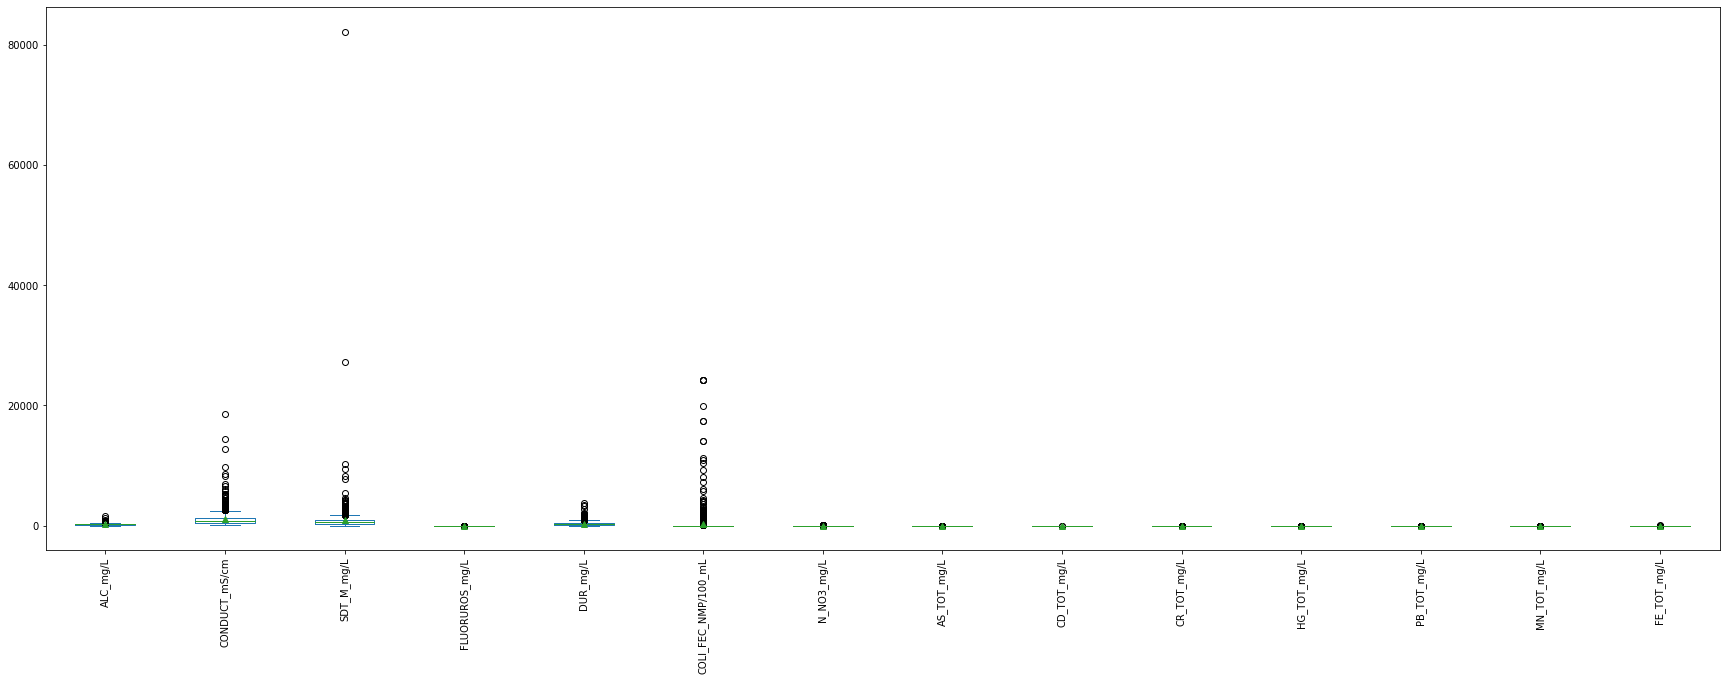

In [19]:
df_num.plot.box(figsize = (30,10),showmeans = True)
plt.xticks(rotation=90)

**Identificar correlaciones**

In [20]:
df_num.corr()

ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  \
ALC_mg/L             1.000000       0.217212    0.079572        0.068860   
CONDUCT_mS/cm        0.217212       1.000000    0.286244       -0.025071   
SDT_M_mg/L           0.079572       0.286244    1.000000       -0.013709   
FLUORUROS_mg/L       0.068860      -0.025071   -0.013709        1.000000   
DUR_mg/L             0.243404       0.692656    0.347211       -0.149549   
COLI_FEC_NMP/100_mL -0.016338       0.018021   -0.001102        0.003564   
N_NO3_mg/L          -0.000346       0.219881    0.101522       -0.019672   
AS_TOT_mg/L          0.073458      -0.005047   -0.010092        0.444079   
CD_TOT_mg/L          0.032706       0.029083    0.010807       -0.015123   
CR_TOT_mg/L         -0.014261       0.004486   -0.000669       -0.005242   
HG_TOT_mg/L          0.067241       0.059153    0.015142       -0.026358   
PB_TOT_mg/L          0.015119       0.024204   -0.005531       -0.032236   
MN_TOT_mg/L          0.129942       0.095940    0.018963       -0.049742   
FE_TOT_mg/L          0.043454       0.083172    0.020103       -0.009994   

                     DUR_mg/L  COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  \
ALC_mg/L             0.243404            -0.016338   -0.000346     0.073458   
CONDUCT_mS/cm        0.692656             0.018021    0.219881    -0.005047   
SDT_M_mg/L           0.347211            -0.001102    0.101522    -0.010092   
FLUORUROS_mg/L      -0.149549             0.003564   -0.019672     0.444079   
DUR_mg/L             1.000000             0.031772    0.301581    -0.106417   
COLI_FEC_NMP/100_mL  0.031772             1.000000   -0.000926     0.038151   
N_NO3_mg/L           0.301581            -0.000926    1.000000    -0.007950   
AS_TOT_mg/L         -0.106417             0.038151   -0.007950     1.000000   
CD_TOT_mg/L          0.025010            -0.001656   -0.009353    -0.009078   
CR_TOT_mg/L          0.007420            -0.008840   -0.015117    -0.009582   
HG_TOT_mg/L          0.064411            -0.007661    0.014942    -0.009939   
PB_TOT_mg/L         -0.018884             0.022510   -0.016507    -0.023057   
MN_TOT_mg/L          0.083868            -0.005326   -0.036810     0.016916   
FE_TOT_mg/L          0.059789             0.003045    0.013307     0.014295   

                     CD_TOT_mg/L  CR_TOT_mg/L  HG_TOT_mg/L  PB_TOT_mg/L  \
ALC_mg/L                0.032706    -0.014261     0.067241     0.015119   
CONDUCT_mS/cm           0.029083     0.004486     0.059153     0.024204   
SDT_M_mg/L              0.010807    -0.000669     0.015142    -0.005531   
FLUORUROS_mg/L         -0.015123    -0.005242    -0.026358    -0.032236   
DUR_mg/L                0.025010     0.007420     0.064411    -0.018884   
COLI_FEC_NMP/100_mL    -0.001656    -0.008840    -0.007661     0.022510   
N_NO3_mg/L             -0.009353    -0.015117     0.014942    -0.016507   
AS_TOT_mg/L            -0.009078    -0.009582    -0.009939    -0.023057   
CD_TOT_mg/L             1.000000    -0.001781    -0.004083    -0.002875   
CR_TOT_mg/L            -0.001781     1.000000     0.005866    -0.001895   
HG_TOT_mg/L            -0.004083     0.005866     1.000000     0.014257   
PB_TOT_mg/L            -0.002875    -0.001895     0.014257     1.000000   
MN_TOT_mg/L            -0.004205    -0.005087     0.641869    -0.010944   
FE_TOT_mg/L            -0.001036     0.000629     0.878592     0.002970   

                     MN_TOT_mg/L  FE_TOT_mg/L  
ALC_mg/L                0.129942     0.043454  
CONDUCT_mS/cm           0.095940     0.083172  
SDT_M_mg/L              0.018963     0.020103  
FLUORUROS_mg/L         -0.049742    -0.009994  
DUR_mg/L                0.083868     0.059789  
COLI_FEC_NMP/100_mL    -0.005326     0.003045  
N_NO3_mg/L             -0.036810     0.013307  
AS_TOT_mg/L             0.016916     0.014295  
CD_TOT_mg/L            -0.004205    -0.001036  
CR_TOT_mg/L            -0.005087     0.000629  
HG_TOT_mg/L             0.641869     0.8

**Gráfica de Correlación**

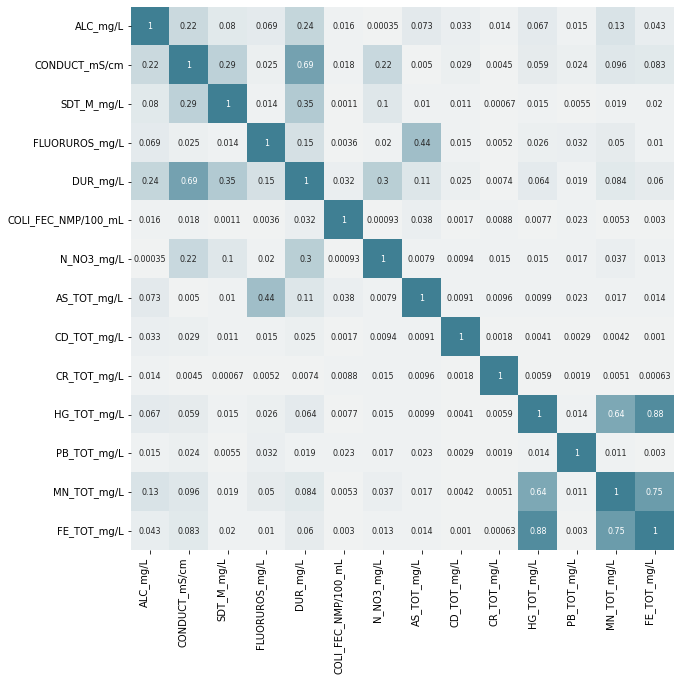

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

mi_correlacion = df_num.corr().abs()

sns.heatmap(
    mi_correlacion,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 90,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

### Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

In [22]:
col_geo=['LONGITUD','LATITUD']
df_ubicacion = df_aguas[col_geo]
df_ubicacion

y

SEMAFORO
0       Verde
1       Verde
2        Rojo
3       Verde
4        Rojo
...       ...
1063     Rojo
1064     Rojo
1065     Rojo
1066    Verde
1067    Verde

[1068 rows x 1 columns]

**Mapa de puntos**

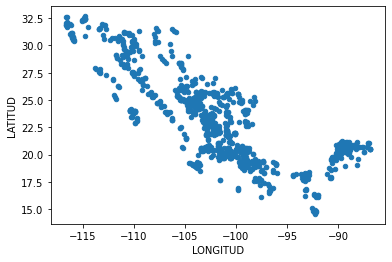

In [23]:
df_ubicacion.plot.scatter('LONGITUD','LATITUD')

**Agregar columna de geometría**

In [24]:
df_ubicacion
df_ubicacion["COORDENADAS"] = list(zip(df_ubicacion.LONGITUD, df_ubicacion.LATITUD))
df_ubicacion["COORDENADAS"] = df_ubicacion["COORDENADAS"].apply(Point)
df_ubicacion.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


LONGITUD   LATITUD                  COORDENADAS
0 -102.02210  22.20887   POINT (-102.0221 22.20887)
1 -102.20075  21.99958  POINT (-102.20075 21.99958)
2 -102.28801  22.36685  POINT (-102.28801 22.36685)
3 -102.29449  22.18435  POINT (-102.29449 22.18435)
4 -110.24480  23.45138   POINT (-110.2448 23.45138)

**Mapa con Limite de Mexico**

LONGITUD   LATITUD                  COORDENADAS
0    -102.02210  22.20887  POINT (-102.02210 22.20887)
1    -102.20075  21.99958  POINT (-102.20075 21.99958)
2    -102.28801  22.36685  POINT (-102.28801 22.36685)
3    -102.29449  22.18435  POINT (-102.29449 22.18435)
4    -110.24480  23.45138  POINT (-110.24480 23.45138)
...         ...       ...                          ...
1063  -99.54191  24.76036   POINT (-99.54191 24.76036)
1064  -99.70099  24.78280   POINT (-99.70099 24.78280)
1065  -99.82249  25.55197   POINT (-99.82249 25.55197)
1066 -100.32683  24.80118  POINT (-100.32683 24.80118)
1067 -100.73302  25.09380  POINT (-100.73302 25.09380)

[1068 rows x 3 columns]

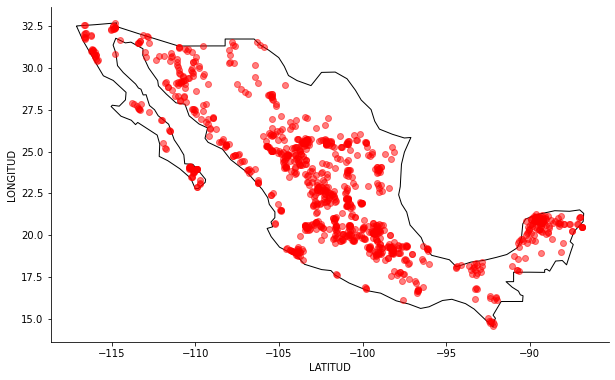

In [25]:
puntos_en_mapa = gpd.GeoDataFrame(df_ubicacion, geometry="COORDENADAS")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos_en_mapa.plot(ax=gax, color='red', alpha = 0.5)
puntos_en_mapa

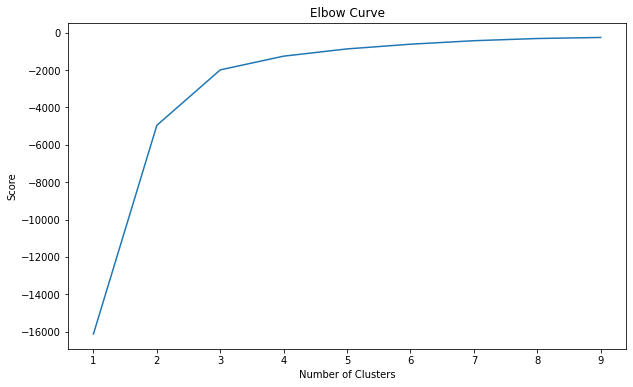

In [26]:
numero_de_clusters = range(1,10) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_clusters]
Y_axis = df_ubicacion[['LATITUD']]
X_axis = df_ubicacion[['LONGITUD']]
calulo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]
plt.figure(figsize=(10,6))
plt.plot(numero_de_clusters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


Realmente la curva es bastante “suave”. Consideramos a 3 como un buen número para K. 

In [27]:
X = df_sub[col_geo]
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_ #Centroides
labels = kmeans.predict(X) #Labels predecidos
C = kmeans.cluster_centers_ #Valores de centroides
C_DF = pd.DataFrame(C) #DataFrame
C_DF["Coordinates"] = list(zip(C_DF[0], C_DF[1])) #Lista 
C_DF["Coordinates"] = C_DF["Coordinates"].apply(Point) #Puntos para gráficar
puntos_centroides = gpd.GeoDataFrame(C_DF, geometry="Coordinates")
puntos_centroides

0          1                  Coordinates
0  -90.728470  19.473362   POINT (-90.72847 19.47336)
1 -101.722127  22.254226  POINT (-101.72213 22.25423)
2 -110.794488  28.438202  POINT (-110.79449 28.43820)

In [28]:
df_sub['SEMAFORO'].value_counts()

Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [29]:
print(y.head())
print(df_ubicacion.head())

  SEMAFORO
0    Verde
1    Verde
2     Rojo
3    Verde
4     Rojo
    LONGITUD   LATITUD                  COORDENADAS
0 -102.02210  22.20887  POINT (-102.02210 22.20887)
1 -102.20075  21.99958  POINT (-102.20075 21.99958)
2 -102.28801  22.36685  POINT (-102.28801 22.36685)
3 -102.29449  22.18435  POINT (-102.29449 22.18435)
4 -110.24480  23.45138  POINT (-110.24480 23.45138)


In [30]:
y['SEMAPHORE'] = y['SEMAFORO'].replace(to_replace = "Verde", value = "green")
y['SEMAPHORE'].replace(to_replace = "Rojo", value = "red", inplace=True)
y['SEMAPHORE'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
y

SEMAFORO SEMAPHORE
0       Verde     green
1       Verde     green
2        Rojo       red
3       Verde     green
4        Rojo       red
...       ...       ...
1063     Rojo       red
1064     Rojo       red
1065     Rojo       red
1066    Verde     green
1067    Verde     green

[1068 rows x 2 columns]

In [31]:
puntos_en_mapa['LATITUDYLONGITUD'] = puntos_en_mapa['LATITUD'] + puntos_en_mapa['LONGITUD']
diccionario_semaforo = dict(zip(puntos_en_mapa.LATITUDYLONGITUD, y.SEMAPHORE))
diccionario_semaforo

import folium
lat = puntos_en_mapa.iloc[0]['LATITUD']
lng = puntos_en_mapa.iloc[0]['LONGITUD']
map = folium.Map(location=[23.438183, -101.879903], zoom_start=5, 
    tiles='Stamen Terrain' )
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row["LATITUD"], row["LONGITUD"]],
        radius=3, 
        weight=1, 
        fill=True, 
        fill_color=diccionario_semaforo[row["LATITUDYLONGITUD"]],
        color=diccionario_semaforo[row["LATITUDYLONGITUD"]]
    ).add_to(map)
color='black'
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row[1], row[0]],
        radius=3, 
        weight=2, 
        fill=True, 
        fill_color=color,
        color=color
    ).add_to(map)
map

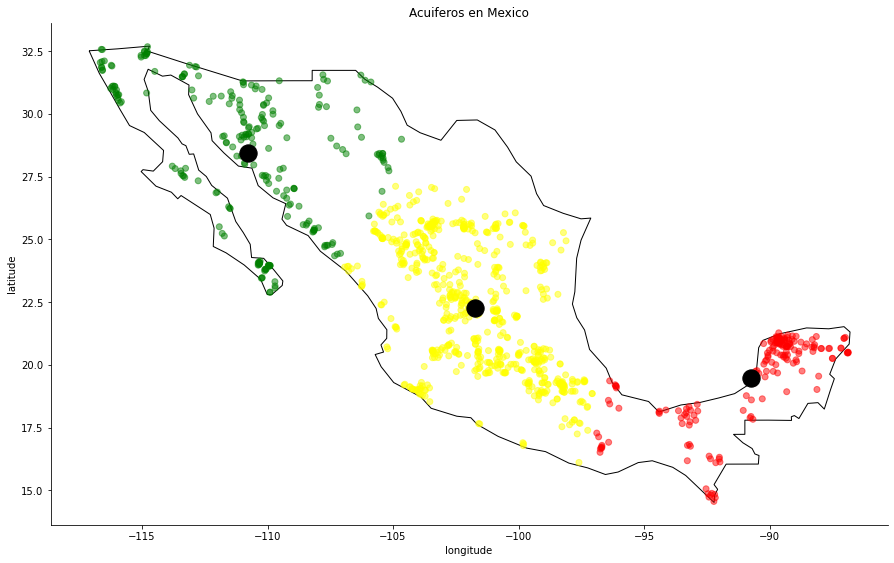

In [32]:
fig, gax = plt.subplots(figsize=(15,10))
colores = ['r','yellow','green']
color_asig = []

for row in labels:
  color_asig.append(colores[row])

world.query("name == 'Mexico'").plot(ax = gax, edgecolor='black', color='white') #filtramos por pais

puntos_en_mapa.plot(ax=gax, color=color_asig, alpha = 0.5) 
puntos_centroides.plot(ax=gax, color='black', alpha = 1, markersize = 300) 

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Acuiferos en Mexico')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [33]:
puntos_en_mapa['COLOR']= y['SEMAFORO']
puntos_en_mapa['CLUSTER'] = labels
puntos_en_mapa

LONGITUD   LATITUD                  COORDENADAS  LATITUDYLONGITUD  \
0    -102.02210  22.20887  POINT (-102.02210 22.20887)         -79.81323   
1    -102.20075  21.99958  POINT (-102.20075 21.99958)         -80.20117   
2    -102.28801  22.36685  POINT (-102.28801 22.36685)         -79.92116   
3    -102.29449  22.18435  POINT (-102.29449 22.18435)         -80.11014   
4    -110.24480  23.45138  POINT (-110.24480 23.45138)         -86.79342   
...         ...       ...                          ...               ...   
1063  -99.54191  24.76036   POINT (-99.54191 24.76036)         -74.78155   
1064  -99.70099  24.78280   POINT (-99.70099 24.78280)         -74.91819   
1065  -99.82249  25.55197   POINT (-99.82249 25.55197)         -74.27052   
1066 -100.32683  24.80118  POINT (-100.32683 24.80118)         -75.52565   
1067 -100.73302  25.09380  POINT (-100.73302 25.09380)         -75.63922   

      COLOR  CLUSTER  
0     Verde        1  
1     Verde        1  
2      Rojo        1  
3     Verde        1  
4      Rojo        2  
...     ...      ...  
1063   Rojo        1  
1064   Rojo        1  
1065   Rojo        1  
1066  Verde        1  
1067  Verde        1  

[1068 rows x 6 columns]

In [34]:
nuevo_dataset = puntos_en_mapa[puntos_en_mapa.CLUSTER == 0].copy()
nuevo_dataset.shape

(180, 6)

In [35]:
lista_de_modas=[]
for i in range(0,3): 
  nuevo_dataset = pd.DataFrame() 
  nuevo_dataset = puntos_en_mapa[puntos_en_mapa.CLUSTER == i].copy() 
  moda = nuevo_dataset['COLOR'].mode()[0] 
  lista_de_modas.append(moda) 
len(lista_de_modas)


3

In [36]:
puntos_centroides['Moda'] = lista_de_modas
puntos_centroides


0          1                  Coordinates      Moda
0  -90.728470  19.473362   POINT (-90.72847 19.47336)  Amarillo
1 -101.722127  22.254226  POINT (-101.72213 22.25423)      Rojo
2 -110.794488  28.438202  POINT (-110.79449 28.43820)     Verde

In [37]:
#https://paratodomexico.com/geografia-de-mexico/hidrografia-de-mexico/acuiferos-de-mexico.html


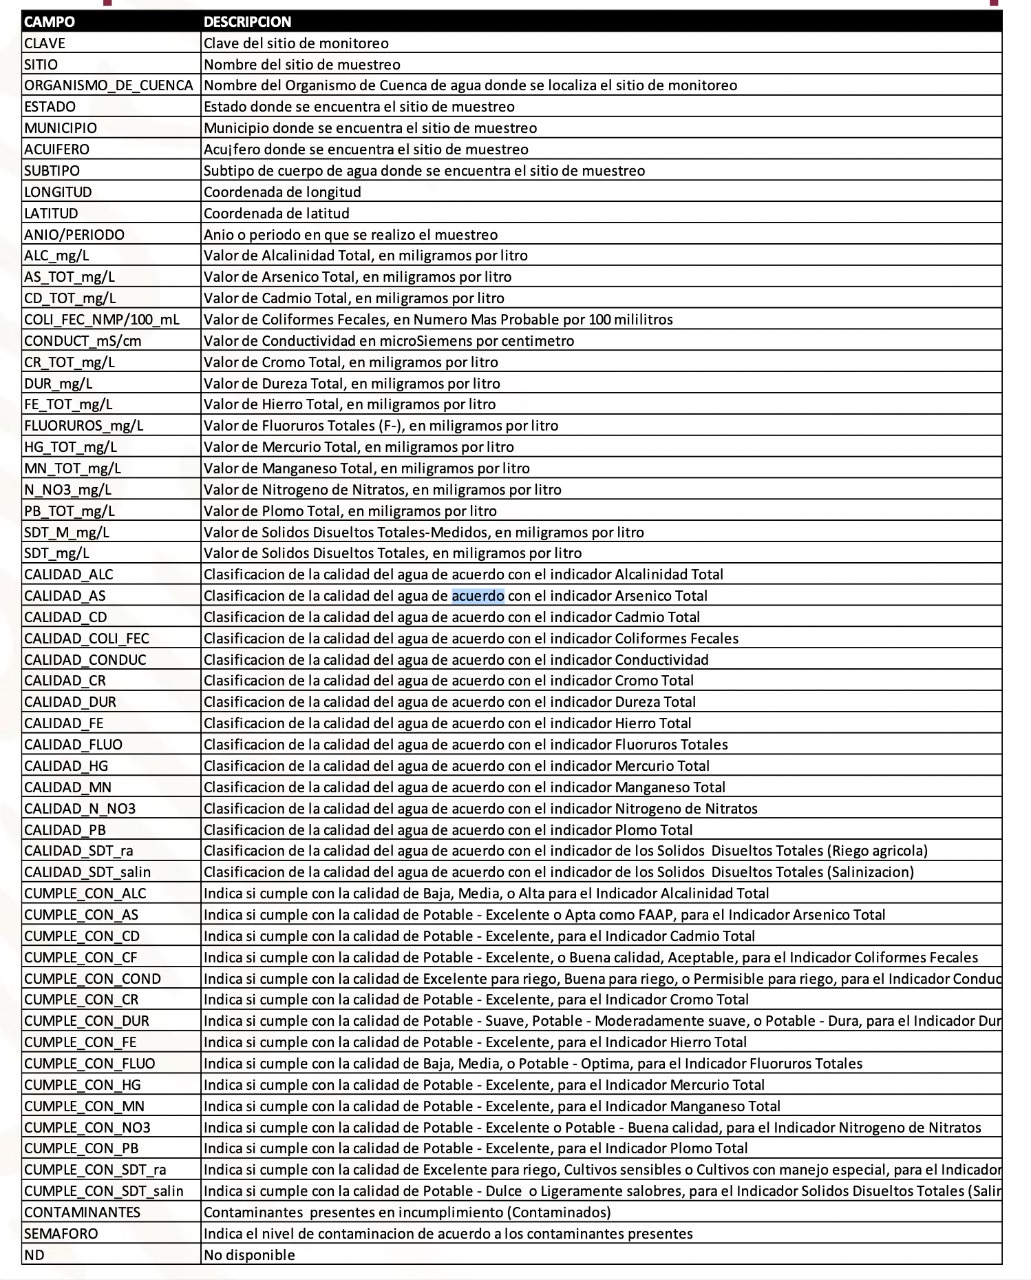

###Clasificación-ensambles 

Utilizando la base de datos que hayas elegido y hayas realizado su limpieza en la anterior entrega del reto, realiza lo siguiente:

- Selecciona tus variables independientes X y dependiente Y (semáforo)
- Cambia a label encoding el semáforo, ej, de ["clase 1", "clase 2", "clase 3"] a [ 1,2,3]
- Realiza un análisis general de las features importances a traves de decision trees o random forest.
- Selecciona las variables de mayor importancia.
- Realiza tu clasificador, recuerda dividir los datos de manera balanceada (auxiliate de train test split)
- Explora que clasificador es el más optimo, ejemplo:
- Decision trees
- Random Forest
- Determina el grado de exactitud a través del reporte de clasificación https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html Links to an external site..

Visualiza los resultados del modelo o las predicciones a través de una matriz de confusión.

Realiza un reporte de los principales hallazgos y conclusiones del experimento e incluyelos en una presentación ejecutiva de 10 diapositivas. La presentación deberá incluir todos los pasos del pipeline seguidos, limpieza, análisis, kmeans, clasificación, resultados y conclusiones.

**Variables dependientes e independientes**

In [38]:
print(df_num)
print(y)
print(df_num.shape)
print(y.shape)

      ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
0      229.990          940.0    603.6000          0.9766  213.7320   
1      231.990          608.0    445.4000          0.9298  185.0514   
2      204.920          532.0    342.0000          1.8045  120.7190   
3      327.000          686.0    478.6000          1.1229  199.8790   
4      309.885         1841.0   1179.0000          0.2343  476.9872   
...        ...            ...         ...             ...       ...   
1063   231.045         2350.0   1545.8000          0.2000  752.0960   
1064   256.000          529.0    297.0000          0.2000  273.0000   
1065   330.690         2600.0   1873.0000          0.7574  660.2126   
1066   193.140          873.0    690.6667          0.7108  406.3680   
1067   263.070          817.0    495.0000          0.4002  362.5440   

      COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
0                     1.1    4.184656       0.0161        0.003    

**Label encoding el semáforo**

In [39]:
label = preprocessing.LabelEncoder()
y["SEMAFORO_Type"]= label.fit_transform(y["SEMAFORO"])
y["SEMAFORO_Type"].unique()

array([2, 1, 0])

**Decision Trees**

In [40]:
semilla=1
x_train, x_test, y_train, y_test = train_test_split(df_num[df_num.columns], y[['SEMAFORO_Type']], test_size=0.2, random_state=semilla, stratify= y)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(854, 14)
(214, 14)
(854, 1)
(214, 1)


In [41]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

     ALC_mg/L  CONDUCT_mS/cm  SDT_M_mg/L  FLUORUROS_mg/L  DUR_mg/L  \
397   131.000          400.0       317.0          0.3500  156.0000   
51     85.470          266.0       249.2          0.2664   91.0432   
920   277.200         1451.0      1096.0          0.4959  443.6708   
346   263.580          924.0       608.0          0.2000  272.3600   
529   184.000          637.0       348.0          0.2970  326.0000   
..        ...            ...         ...             ...       ...   
909   164.065         1385.0      1396.0          0.2693  457.4937   
3     327.000          686.0       478.6          1.1229  199.8790   
366   403.300          826.0       546.4          0.8505  243.4170   
733   369.000          786.0       521.0          0.2000  471.0000   
579   149.850          454.0       339.0          2.1357   91.6320   

     COLI_FEC_NMP/100_mL  N_NO3_mg/L  AS_TOT_mg/L  CD_TOT_mg/L  CR_TOT_mg/L  \
397                 75.0    1.149000      0.01000        0.003      0.00500   
5

**Balanceo de clases**

In [42]:
y_test.value_counts()

SEMAFORO_Type
2                87
1                78
0                49
dtype: int64

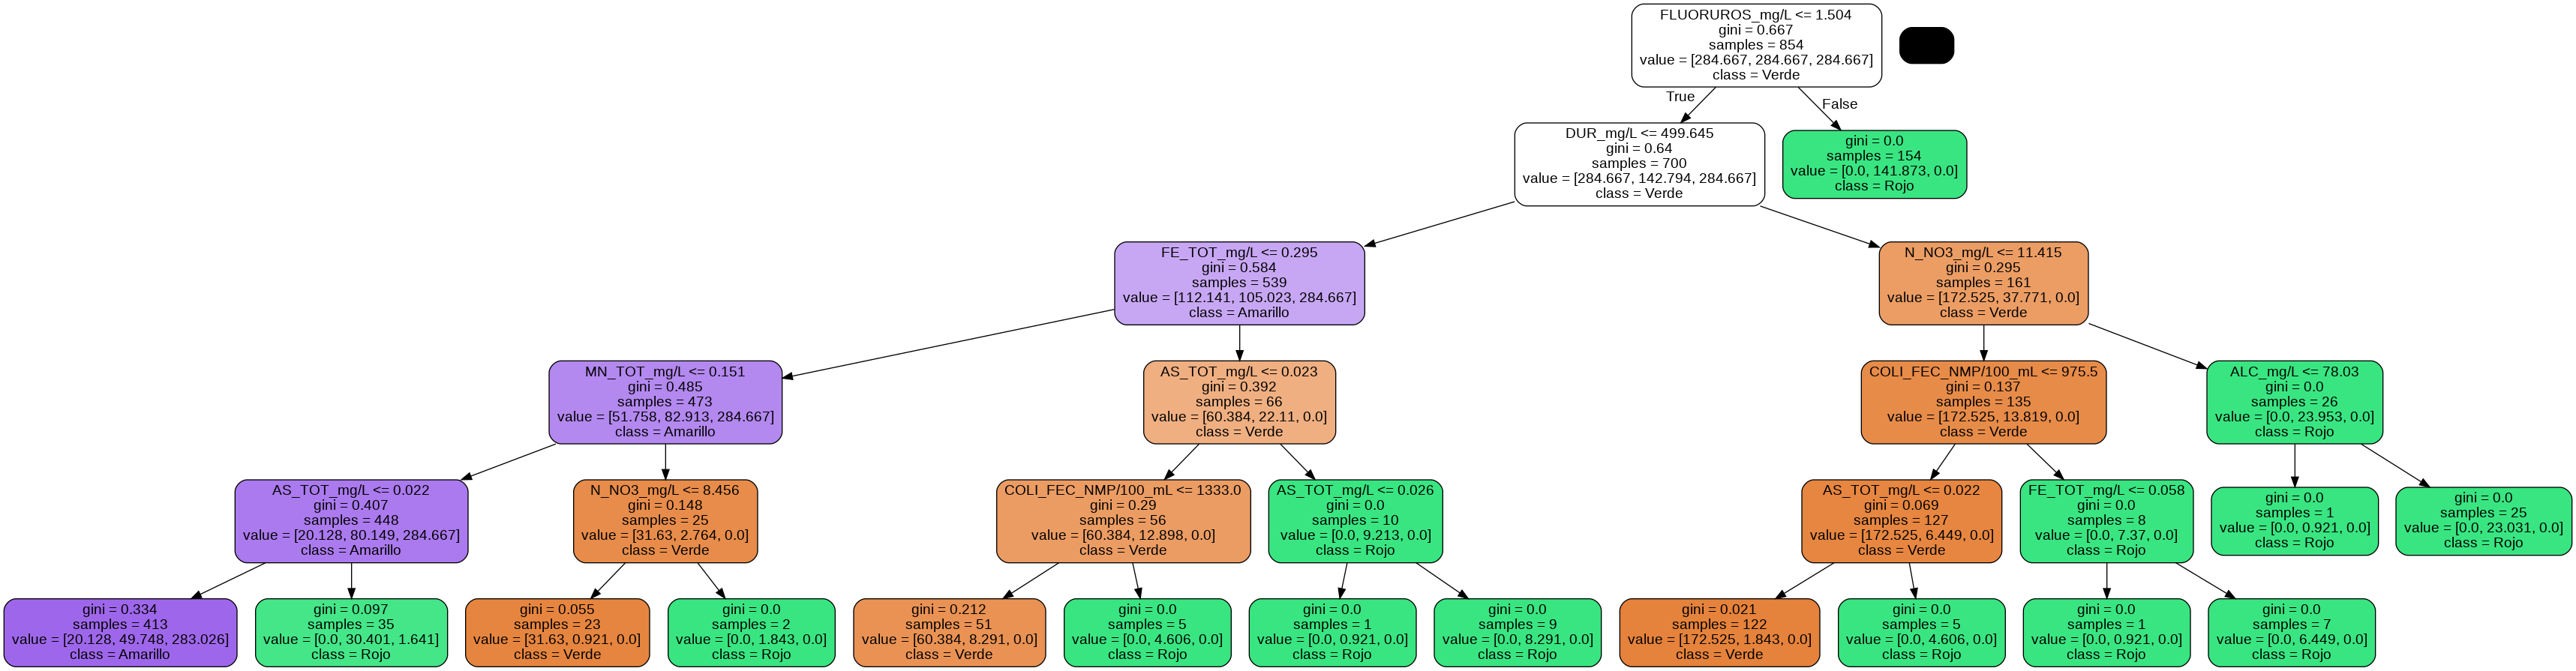

In [43]:
arbol_clasificador = tree.DecisionTreeClassifier(max_depth=5, random_state=42, class_weight='balanced') 
arbol_clasificador = arbol_clasificador.fit(x_train, y_train)
arbol= export_graphviz (arbol_clasificador,
                        out_file = None,
                        feature_names= x_train.columns,
                        class_names = ['Verde','Rojo','Amarillo'],
                        rounded = True,
                        filled = True)
graph = pydotplus.graph_from_dot_data(arbol)
graph.write_png('Arbol.png')
Image(filename = 'Arbol.png')

**Precisión**

In [44]:
def mi_accuracy(yreal, ypred):
  cm = confusion_matrix(yreal, ypred)
  VPC1 = cm[0,0]
  VPC2 = cm[1,1]
  VPC3 = cm[2,2]
  vp = VPC1 + VPC2 + VPC3

  FPC1 = cm[0,1] + cm[0,2]
  FPC2 = cm[1,0] + cm[1,2]
  FPC3 = cm[2,0] + cm[2,1]
  fp = FPC1 + FPC2 + FPC3
  
  FNC1 = cm[1,0] + cm[2,0]
  FNC2 = cm[0,1] + cm[2,1]
  FNC3 = cm[0,2] + cm[1,2]
  fn = FNC1 + FNC2 + FNC3

  VNC1 = cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2]
  VNC2 = cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2]
  VNC3 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]
  vn = VNC1 + VNC2 + VNC3

  return (vp+vn)/(vp+vn+fp+fn+np.finfo(np.float32).eps)

In [45]:
precision_arbol = arbol_clasificador.predict(x_test)
print('Precisión: ',mi_accuracy(y_test,precision_arbol))

Precisión:  0.8971962615156478


In [46]:
x_train.columns

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')

**Feature Importance**

In [47]:
arbol_clasificador.feature_importances_

array([2.97923338e-16, 0.00000000e+00, 0.00000000e+00, 2.64733812e-01,
       2.34849976e-01, 4.62829247e-02, 9.26118401e-02, 1.30058292e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       9.69406769e-02, 1.34522478e-01])

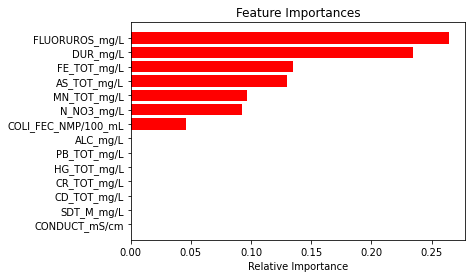

In [48]:
importances = arbol_clasificador.feature_importances_
indices = np.argsort(importances)
features= x_test.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Radom Forest**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


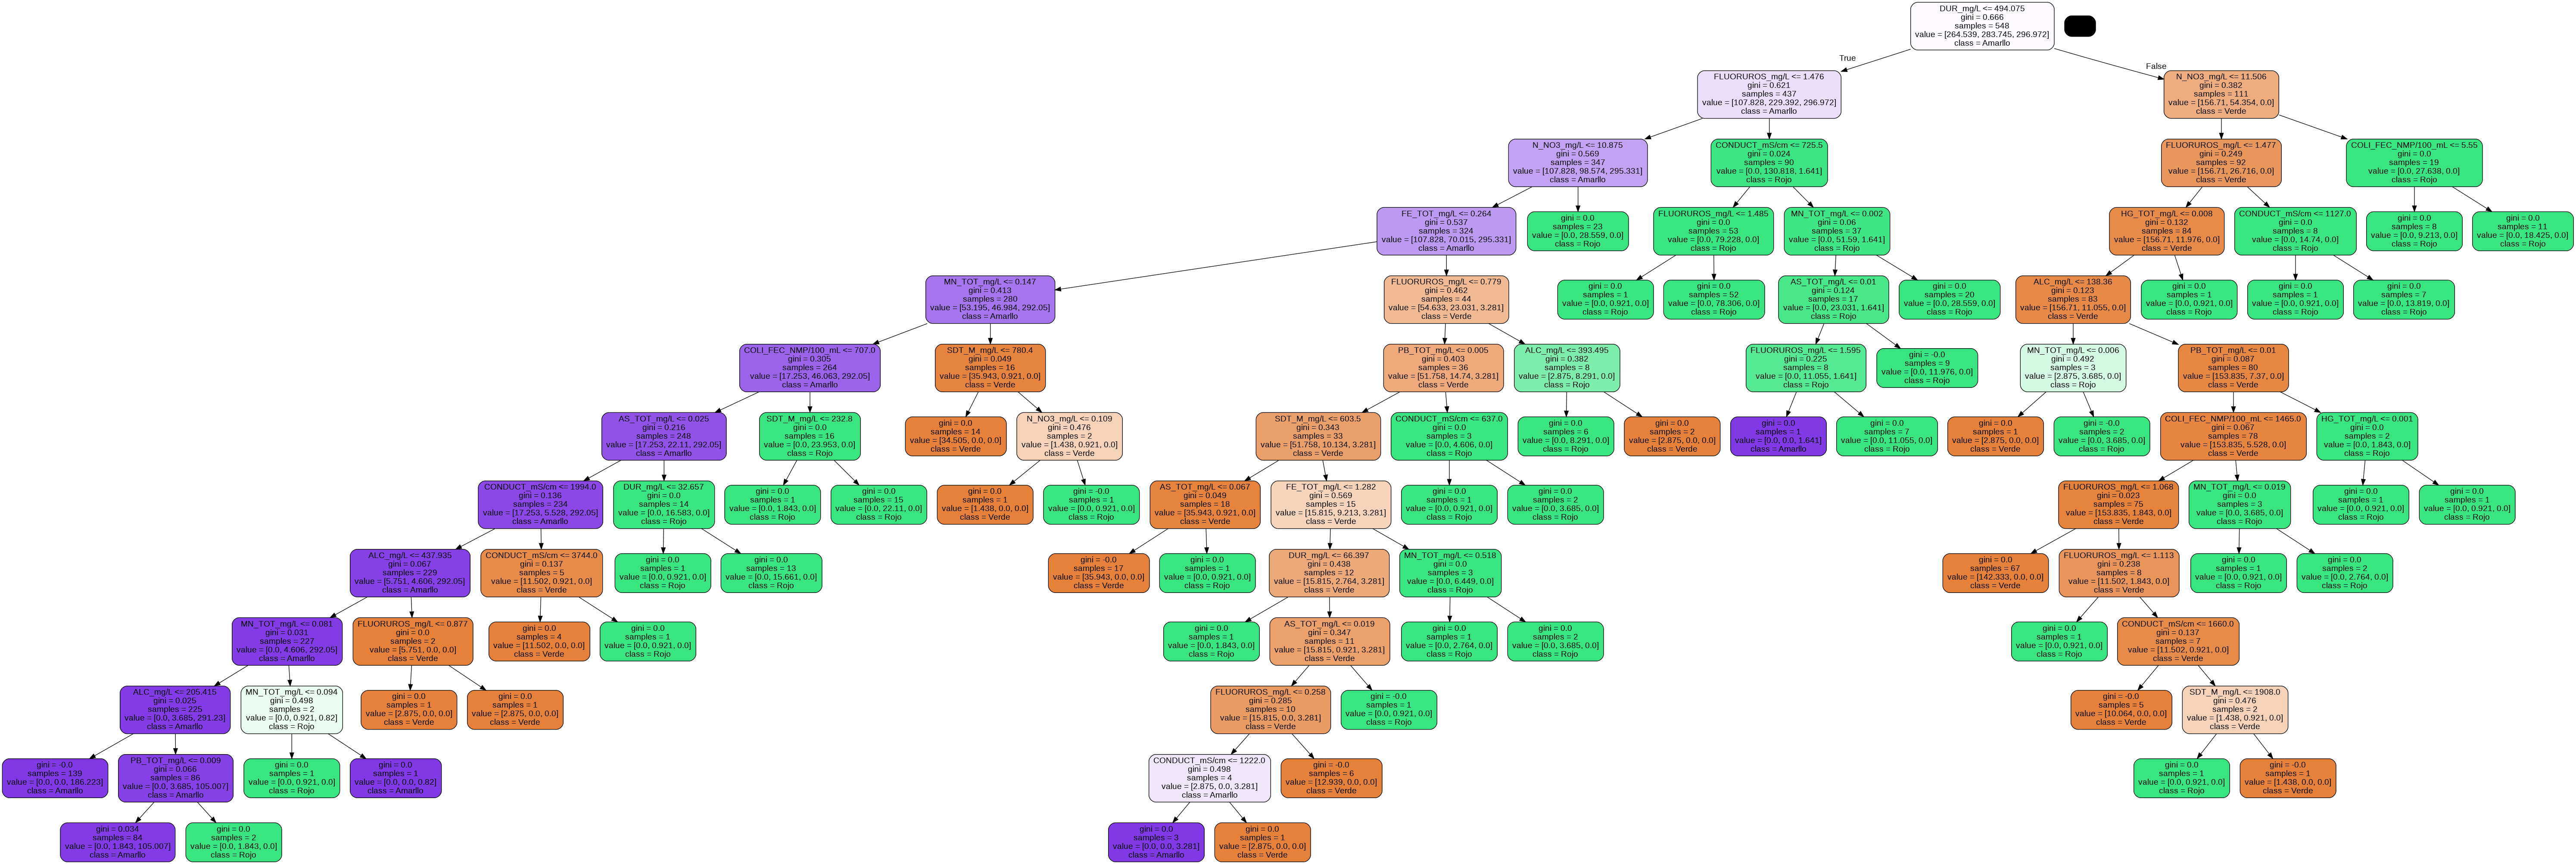

In [49]:
bosque = RandomForestClassifier(max_depth=12, random_state=42, class_weight='balanced') #Aqui nos va a balancear la salida
bosque = bosque.fit(x_train, y_train)
bosque_aleatorio = bosque[10]
arbol= export_graphviz (bosque_aleatorio,
                        out_file = None,
                        feature_names= x_train.columns,
                        class_names = ['Verde','Rojo','Amarllo'],
                        rounded = True,
                        filled = True)
graph = pydotplus.graph_from_dot_data(arbol)
graph.write_png('Arbol_color.png')
Image(filename = 'Arbol_color.png')

**Feature Importance**

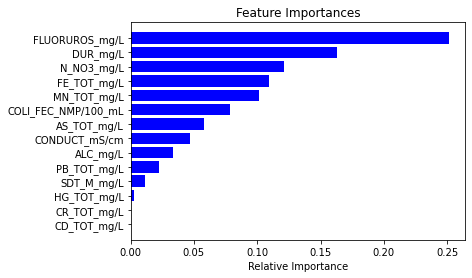

In [50]:
importances = bosque_aleatorio.feature_importances_
indices = np.argsort(importances)
features= x_test.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [51]:
precision_bosque = bosque_aleatorio.predict(x_test)
print('Precisión: ',mi_accuracy(y_test,precision_bosque))

Precisión:  0.9408099686726584


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


**Clasificadores**

In [52]:
classifiers = [
                ['DecisionTree :',arbol_clasificador],
                ['RandomForest :',bosque_aleatorio] 
              ]
              
predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(x_train, np.ravel(y_train))
    predictions = classifier.predict(x_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, mi_accuracy(y_test, predictions))

DecisionTree : 0.8971962615156478
RandomForest : 0.9127725855002944


**Exactitud**

In [53]:
eclf1 = VotingClassifier(estimators=[ ('DecisionTree :' , arbol_clasificador),('RandomForest :',bosque_aleatorio)], voting='soft')
eclf1.fit(x_train, np.ravel(y_train))
predictions = eclf1.predict(x_test)
print("Votos Soft")
print(classification_report(y_test, predictions))
print("\n")

eclf2 = VotingClassifier(estimators=[  ('DecisionTree :' , arbol_clasificador),('RandomForest :',bosque_aleatorio)], voting='hard')
eclf2.fit(x_train, np.ravel(y_train))
predictions2 = eclf2.predict(x_test)
print("Votos Hard")
print(classification_report(y_test, predictions2))

Votos Soft
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        49
           1       0.86      0.88      0.87        78
           2       0.94      0.95      0.95        87

    accuracy                           0.88       214
   macro avg       0.87      0.86      0.87       214
weighted avg       0.88      0.88      0.88       214



Votos Hard
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        49
           1       0.94      0.82      0.88        78
           2       0.98      0.94      0.96        87

    accuracy                           0.90       214
   macro avg       0.89      0.91      0.89       214
weighted avg       0.91      0.90      0.90       214



**Matriz de Confusión**

In [54]:
def CM_modelo(modelo,X,y,X_test,y_test):

    modelo.fit(X, y)

    yhat = modelo.predict(x_test)

    cm = confusion_matrix(y_test, yhat)

    txt = ['P0,0','P0,1','P0,2',
       'P1,0','P1,1','P1,2',
       'P2,0','P2,1','P2,2',]
    frecuencia = ["{0:0.0f}".format(value) for value in cm.flatten()]
    porcentaje = ["{0:.1%}".format(value) for value in cm.flatten()/np.sum(cm)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
    labels = np.asarray(labels).reshape(3,3)
    labels
    ax = sns.heatmap(cm, annot=labels, fmt='', cmap='Reds', cbar=False)
    ax.set(ylabel="Etiquetas Reales", xlabel="Etiquetas de Predicción")
    plt.show()


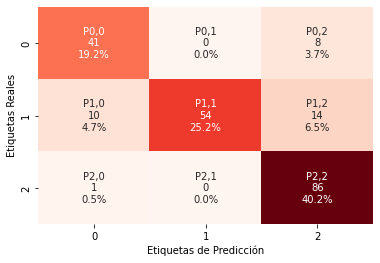

In [55]:
CM_modelo(arbol_clasificador,x_train,np.ravel(y_train),x_test,np.ravel(y_test))

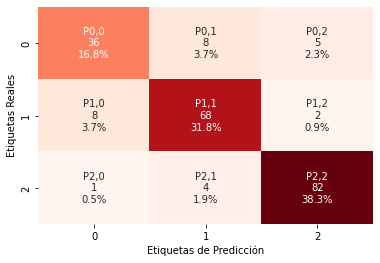

In [56]:
CM_modelo(bosque_aleatorio,x_train,np.ravel(y_train),x_test,np.ravel(y_test))